<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 179.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 181.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 135.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 150.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 164.9 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [6]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [7]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [8]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 20
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [14]:

# Columns to check duplicates by
subset_cols = ["MainBranch", "Employment", "RemoteWork"]

# Identify duplicates based on selected columns
duplicate_mask = df.duplicated(subset=subset_cols, keep=False)
duplicate_subset = df[duplicate_mask]

print("Number of duplicates based on selected columns:", duplicate_subset.shape[0])
print("\nFirst few duplicate rows based on selected columns:")
print(duplicate_subset.head())

groups = duplicate_subset.groupby(subset_cols)

# Step 2: For each group, check identical values column by column
identical_counts = {}

for col in df.columns:
    # Count how many groups have the same value across that entire group
    count = sum(group[col].nunique() == 1 for _, group in groups)
    identical_counts[col] = count

# Convert result to a sorted DataFrame (largest identical frequency first)
identical_df = pd.DataFrame.from_dict(identical_counts, orient='index', columns=['Identical_in_Groups'])
identical_df = identical_df.sort_values(by="Identical_in_Groups", ascending=False)

print("\nColumns that frequently have identical values in duplicate groups:")
print(identical_df)


Number of duplicates based on selected columns: 65290

First few duplicate rows based on selected columns:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source proj

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


Number of duplicate rows: 40


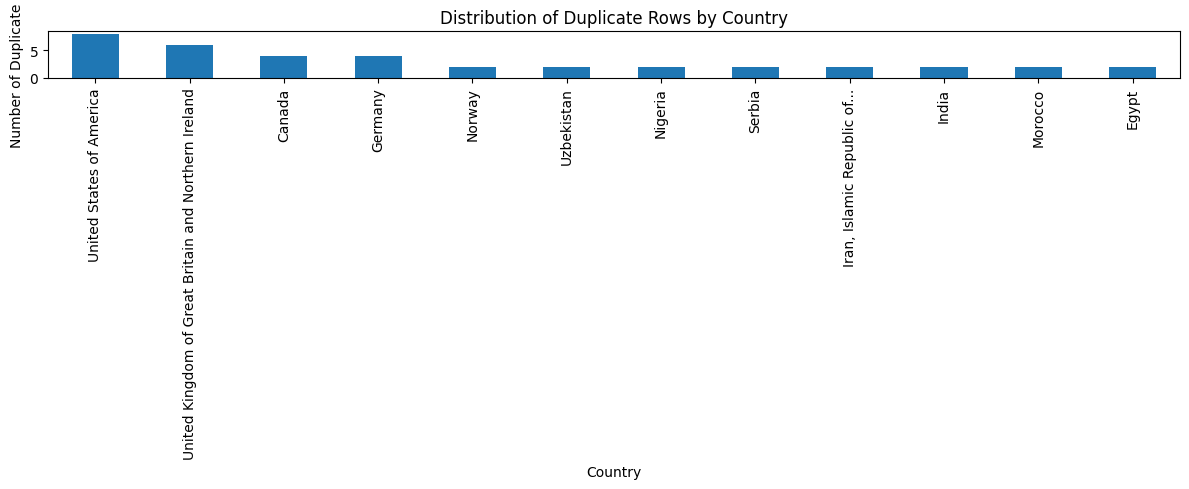

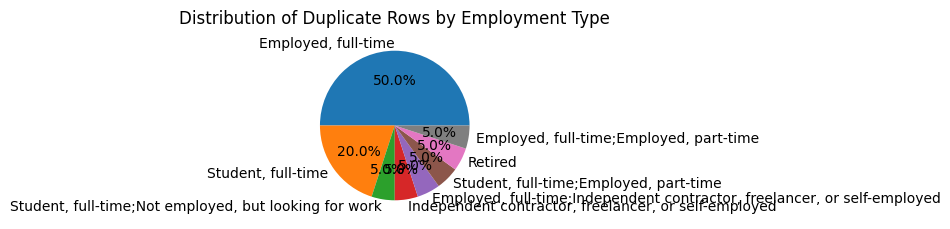

In [16]:


import pandas as pd
import matplotlib.pyplot as plt

# ---- Load your dataset ----
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# ---- Identify duplicate rows (full row duplicates) ----
duplicates = df[df.duplicated(keep=False)]

print("Number of duplicate rows:", len(duplicates))

# ---------------------------
# BAR CHART: DUPLICATES BY COUNTRY
# ---------------------------

country_counts = duplicates['Country'].value_counts()

plt.figure(figsize=(12,5))
country_counts.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Duplicate Rows")
plt.title("Distribution of Duplicate Rows by Country")
plt.tight_layout()
plt.show()

# ---------------------------
# PIE CHART: DUPLICATES BY EMPLOYMENT
# ---------------------------

employment_counts = duplicates['Employment'].value_counts()

plt.figure(figsize=(7,7))
employment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Duplicate Rows by Employment Type")
plt.ylabel("")  # hides y-label
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [17]:

# ---- Decide critical uniqueness columns ----
subset_cols = ["MainBranch", "Employment", "RemoteWork", "Country"]

# ---- Identify duplicates based on subset ----
duplicate_mask = df.duplicated(subset=subset_cols, keep=False)
duplicates_subset = df[duplicate_mask]

print("Number of duplicates based on selected columns:", duplicates_subset.shape[0])

# ---- Show sample duplicates ----
print("\nSample duplicates based on key identity columns:")
print(duplicates_subset.head())

# ---- Remove duplicates based on subset ----
df_cleaned = df.drop_duplicates(subset=subset_cols, keep="first")

print("\nOriginal dataset size:", df.shape[0])
print("Cleaned dataset size:", df_cleaned.shape[0])
print("Number of rows removed:", df.shape[0] - df_cleaned.shape[0])


Number of duplicates based on selected columns: 61819

Sample duplicates based on key identity columns:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source project

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


Loaded the dataset and checked for exact (full-row) duplicates, which were minimal and not reliable for identifying repeated respondents.

Selected key identity columns — MainBranch, Employment, RemoteWork, Country — as the basis for defining uniqueness.

Detected duplicates by finding rows that shared identical values across these selected columns.

Inspected sample duplicate rows to confirm that the chosen columns correctly captured repeated respondent profiles.

Removed duplicates using these columns, keeping only the first occurrence to produce a clean and reliable dataset.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


Selected columns like MainBranch, Employment, RemoteWork, and Country are stable attributes that rarely change for the same respondent.

They are structured and categorical, avoiding noise from free-text or numeric fields that vary.

The combination provides distinctiveness, distinguishing different respondents while capturing repeats.

Volatile fields like ResponseId or timestamps are avoided, as they may hide true duplicates or remove valid rows.

This subset balances strictness and flexibility, ensuring likely duplicate responses are removed without affecting unique records.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
